# ASSIGNMENT - I BIG DATA ANALYSIS
# NAME- ANAS KHURSHEED
# CLASS- M.Sc (DATA SCIENCE)
# ROLL No.- 21DSMSA110
# EN. No.- GJ0969
# TOPIC : DATA CLUSTERING USING PYTHON


# CLUSTERING:
Clustering is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [4]:
df = pd.read_csv("income.csv")
df.head()


,Name,Age,Income($),Unnamed: 3
0,Rob,27,70000,NaN
1,Michael,29,90000,NaN
2,Mohan,29,61000,NaN
3,Ismail,28,60000,NaN
4,Kory,42,150000,NaN


In [5]:
df

,Name,Age,Income($),Unnamed: 3
0,Rob,27,70000,NaN
1,Michael,29,90000,NaN
2,Mohan,29,61000,NaN
3,Ismail,28,60000,NaN
4,Kory,42,150000,NaN
5,Gautam,39,155000,NaN
6,David,41,160000,NaN
7,Andrea,38,162000,NaN
8,Brad,36,156000,NaN
9,Angelina,35,130000,NaN


Text(0, 0.5, 'Income($)')

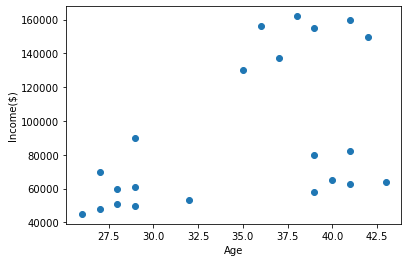

In [56]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')


In [57]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [58]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),Unnamed: 3,cluster
0,Rob,27,70000,NaN,2
1,Michael,29,90000,NaN,2
2,Mohan,29,61000,NaN,1
3,Ismail,28,60000,NaN,1
4,Kory,42,150000,NaN,0


In [59]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

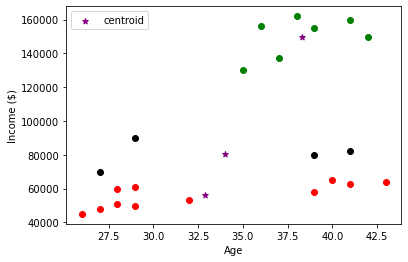

In [60]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

# Preprocessing using min max scaler

Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one


In [61]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


In [62]:
df.head()

,Name,Age,Income($),Unnamed: 3,cluster
0,Rob,0.058824,0.213675,NaN,2
1,Michael,0.176471,0.384615,NaN,2
2,Mohan,0.176471,0.136752,NaN,1
3,Ismail,0.117647,0.128205,NaN,1
4,Kory,0.941176,0.897436,NaN,0


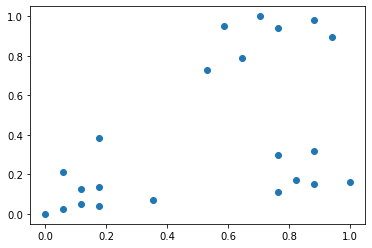

In [63]:
plt.scatter(df.Age,df['Income($)'])

In [64]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [65]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),Unnamed: 3,cluster
0,Rob,0.058824,0.213675,NaN,0
1,Michael,0.176471,0.384615,NaN,0
2,Mohan,0.176471,0.136752,NaN,0
3,Ismail,0.117647,0.128205,NaN,0
4,Kory,0.941176,0.897436,NaN,1


In [66]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

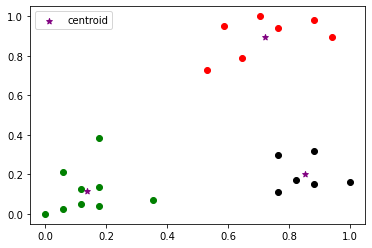

In [67]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# Elbow Plot

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


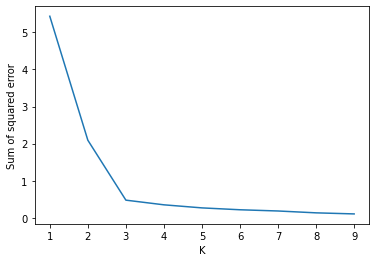

In [68]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [6]:
df.tail()

,Name,Age,Income($),Unnamed: 3
17,Priyanka,41,63000,NaN
18,Nick,43,64000,NaN
19,Alia,39,80000,NaN
20,Sid,41,82000,NaN
21,Abdul,39,58000,NaN


In [7]:
df

,Name,Age,Income($),Unnamed: 3
0,Rob,27,70000,NaN
1,Michael,29,90000,NaN
2,Mohan,29,61000,NaN
3,Ismail,28,60000,NaN
4,Kory,42,150000,NaN
5,Gautam,39,155000,NaN
6,David,41,160000,NaN
7,Andrea,38,162000,NaN
8,Brad,36,156000,NaN
9,Angelina,35,130000,NaN


# Agglomerative Clustering

Clustering or cluster analysis is an unsupervised learning problem.

It is often used as a data analysis technique for discovering interesting patterns in data, such as groups of customers based on their behavior.

There are many clustering algorithms to choose from and no single best clustering algorithm for all cases. Instead, it is a good idea to explore a range of clustering algorithms and different configurations for each algorithm.

In this tutorial, you will discover how to fit and use top clustering algorithms in python.

After completing this tutorial, you will know:

Clustering is an unsupervised problem of finding natural groups in the feature space of input data.
There are many different clustering algorithms and no single best method for all datasets.
How to implement, fit, and use top clustering algorithms in Python with the scikit-learn machine learning library.

# Clustering

Cluster analysis, or clustering, is an unsupervised machine learning task.

It involves automatically discovering natural grouping in data. Unlike supervised learning (like predictive modeling), clustering algorithms only interpret the input data and find natural groups or clusters in feature space.

Clustering can be helpful as a data analysis activity in order to learn more about the problem domain, so-called pattern discovery or knowledge discovery.

# Clustering Algorithms

There are many types of clustering algorithms.

Many algorithms use similarity or distance measures between examples in the feature space in an effort to discover dense regions of observations. As such, it is often good practice to scale data prior to using clustering algorithms.

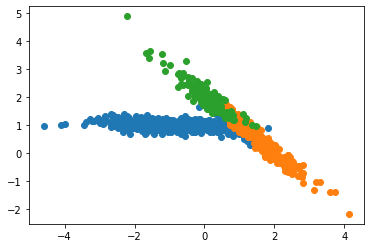

In [71]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# BIRCH

BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using
Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.

BIRCH is a clustering technique used for very large datasets. A fast algorithm that scans the entire dataset in a single pass. It is dedicated to solving the issues of large dataset clustering by focusing on densely occupied spaces and creating a precise summary.



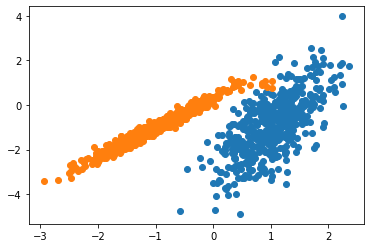

In [72]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# DBSCAN

DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.



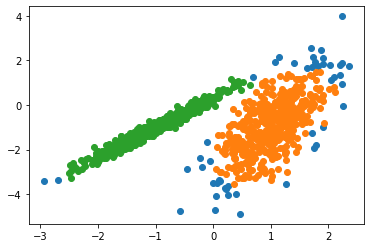

In [73]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# K-MEANS

K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster.

K-Means is a partition-based clustering technique that uses the distance between the Euclidean distances between the points as a criterion for cluster formation. Assuming there are ‘n’ numbers of data objects, K-Means groups them into a predetermined ‘k’ number of clusters.



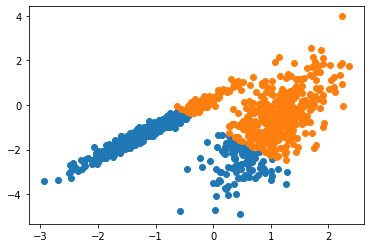

In [9]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Mini Batch K-Means

Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


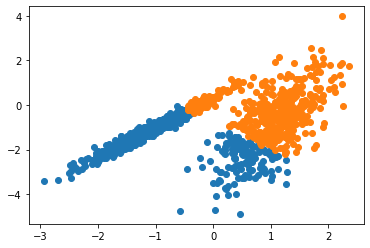

In [75]:
# mini-batch k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MiniBatchKMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Mean Shift

Mean shift clustering involves finding and adapting centroids based on the density of examples in the feature space.

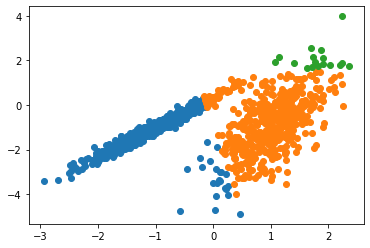

In [42]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Optics

OPTICS clustering (where OPTICS is short for Ordering Points To Identify the Clustering Structure) is a modified version of DBSCAN described above.

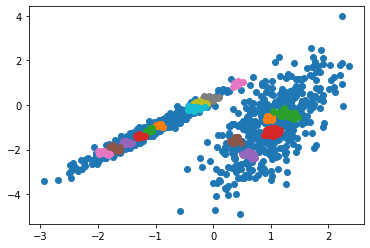

In [1]:
# optics clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Spectral Clustering
Spectral Clustering is a general class of clustering methods, drawn from linear algebra.

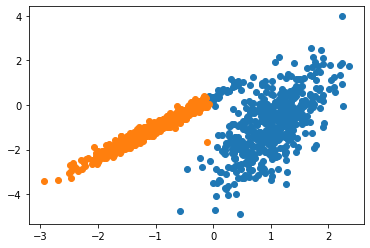

In [2]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = SpectralClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Gaussian Mixture Model

A Gaussian mixture model summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests.

The gaussian mixture model (GMM) is a distribution-based clustering technique. It is based on the assumption that the data comprises Gaussian distributions. It is a statistical inference clustering technique. The probability of a point being a part of a cluster is inversely dependent on distance, as the distance from distribution increases, the probability of a point belonging to the cluster decreases. The GM model trains the dataset and assumes a cluster for every object in the dataset. Later, a scatter plot is created with data points with different colors assigned to each cluster.

GMM determines probabilities and allocates them to data points in the ‘K’ number of clusters. Each of which has three parameters: Mean, Covariance and mixing probability. To compute these parameters GMM uses the Expectation Maximization technique.

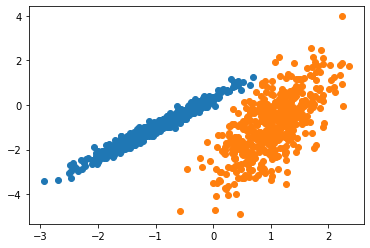

In [46]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()